# How to use SourceDetect

This notebook provides a concise example of how to use SourceDetect for object detection in TESS images and how to view the results. 

Firstly, we will import and call `SourceDetect`, the parent class itself. The only necessary parameter is:

- `flux` : the TESS flux array itself or its filepath; the flux array must be 2D with dimensions $(y,x)$ or 3D with dimensions $(n_{frames},y,x)$

In [1]:
import sourcedetect
from sourcedetect import SourceDetect
import os 
 
flux = os.path.dirname(os.path.abspath(sourcedetect.__file__)) + '/' + 'example_frame.npy')

objdet = SourceDetect(flux=flux)

If we wish to run the default model then those 2 parameters are all that is required. Alternatively, if we wish to load a custom model, that can be done by specifying it with the optional `model` parameter (model filename str). Furthermore, if the custom model is yet to be trained `SourceDetect` will call the `PrfModel` class to do this for us with the optional `train` parameter (bool). See the notebook `PrfModel_example.ipynb` for more information about what happens here behind the scenes. 

In [2]:
import keras 

custom_model = keras.saving.load_model(os.path.dirname(os.path.abspath(sourcedetect.__file__)) + '/' + 'default_model.keras')

objdet = SourceDetect(flux=flux,model=custom_model,train=False)

If you wish to train on a different dataset to the default, it can be called using `Xtrain` and `ytrain` to load the dataset and its labels, respectively (must be npy files). We can also readjust the model optimiser, learning rate, optimisation metric, and/or training monitor, batch size, number of epochs, and validation split. These are all optional parameters when calling SourceDetect with default values shown below:

In [3]:
object = SourceDetect(filename=filename,custom_model=custom_model,batch_size=32,epochs=50,validation_split=0.1
                       ,optimizer=tf.keras.optimizers.Adam,learning_rate=0.003,metrics=["categorical_accuracy"],monitor='loss')

The initialisation of `SourceDetect` also accepts 4 additional parameters:

- `savepath` : the path to where output models, tables, and figures will be saved; by default SourceDetect saves to the current directory
- `run` : boolean parameter that specifies whether the object detection process should run immediately when calling `SourceDetect`
- `do_cut` : boolean parameter that specifies whether frames are cut via a user prompt to specify the desired region to keep
- `precheck` : boolean parameter that specifies whether the first frame is displayed prior to object detection to check for any formatting issues 

Note that if `run` is False then `objdet.preview` can be used to apply a precheck to any specified frame using the `frame` parameter (default is frame 0)

There are 2 ways to run the object detection process:

In [ ]:
objdet = SourceDetect(flux=flux,run=True)

### OR

In [ ]:
objdet = SourceDetect(flux=flux)
objdet.SourceDetect()

Note here that `objdet.SourceDetect` also has the booolean parameter `train`: similar to above. If we chose to use the first method:

In [5]:
objdet = SourceDetect(flux=flux,run=True)

Loading model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Performing object detection:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Object detection complete
Collection complete


The key variables are `objdet.result` and `objdet.events`: summary table containing useful information about every individual detection across all frames and every unique source detected across all frames, respectively. These are automatically written to the specified savepath.

In [6]:
objdet.result

,x_centroid,y_centroid,flux,frame,n_detections,objid,flux_sign
0,33,101,-125.164007,0,1,0,negative
1,63,386,33.704027,0,1,1,positive
2,111,122,71.752791,0,1,2,positive
3,142,44,-205.544477,0,1,3,negative
4,334,5,-278.317114,0,1,4,negative
5,373,302,42.631560,0,1,5,positive
6,372,391,284.368397,0,1,6,positive
7,379,343,-107.121299,0,1,7,negative
8,400,212,854.271634,0,1,8,positive
9,439,9,-26.032716,0,1,9,negative


The same SourceDetect object can be reused for different images by recalling `objdet.SourceDetect` with a new value for `flux`:

In [ ]:
fluxes = [flux1,flux2,flux3]
for flux in fluxes:
    objdet.SourceDetect(flux=flux)

This will save all tables and (if desired) plots to objdet.savepath or a unique savepath can be used for each set of images by using the `savepath` parameter when recalling objdet.SourceDetect each time. `SourceDetect` can also plot the object detection results for any frame or region of a frame. The above SourceDetect run was applied to `example_frame.npy` which is a single frame. The result can be called as follows:

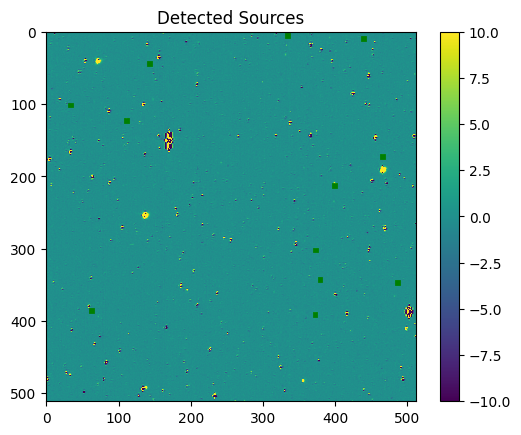

In [7]:
objdet.plot()

Note that we would typically specify the frame to be plotted using the `frame` parameter but in the case of `example_frame.npy` there is only frame 0 (the default for `objdet.plot`). We can also compare this plot to one without the object detection boxes using the parameters `which_plots` and `compare`:

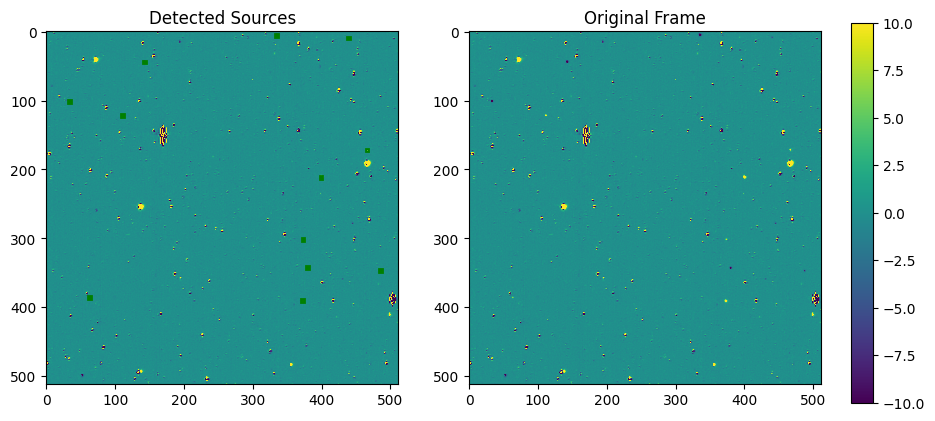

In [8]:
objdet.plot(which_plots=['sources','nobox'],compare=True)

By default, `which_plots` and `compare` are `['sources']` and `False`, respectively. When `compare` is set to `False`, separate plots are made. We can also save any plots to the path defined when calling `SourceDetect`:

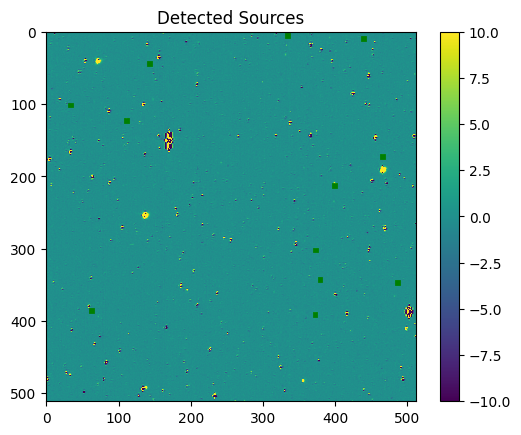

In [9]:
objdet.plot(saveplots=True,savename='example_frame')

Finally, if we wish to plot a specific region of a frame we can call `objdet.check_region` with the bounds of the desired region before calling `objdet.plot`. This defines the parameter `objdet.zoom` which defines the bounds of the plotting region and can be applied to `objdet.plot` by including the parameter `zoom`:

(0.0, 150.0)

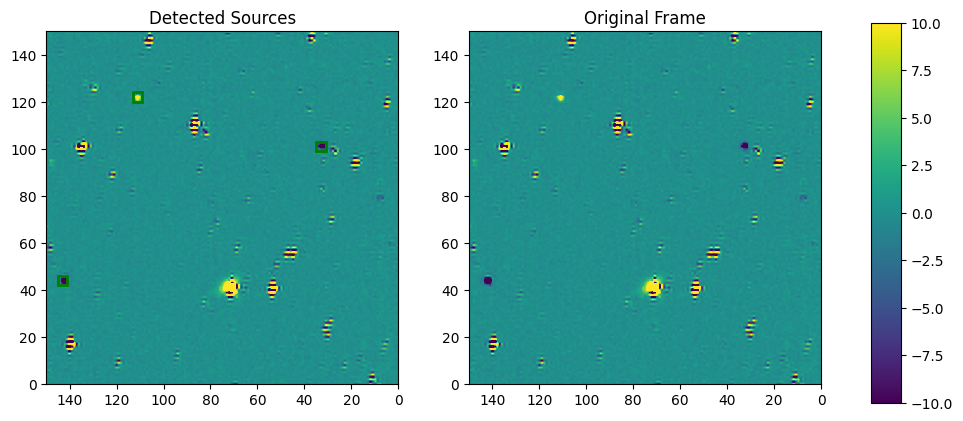

In [10]:
objdet.check_region(xrange=[0,150],yrange=[0,150],frame=0)
objdet.plot(which_plots=['sources','nobox'],compare=True,zoom=True,saveplots=True,savename='example_frame')